In [251]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_style("whitegrid")

In [193]:
movies_df = pd.read_csv('data/tmdb.movies.csv')
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [194]:
movies_df.drop(['original_language', 'original_title', 'title'], axis=1, inplace=True)
movies_df.head()

,Unnamed: 0,genre_ids,id,popularity,release_date,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,33.533,2010-11-19,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,28.734,2010-03-26,7.7,7610
2,2,"[12, 28, 878]",10138,28.515,2010-05-07,6.8,12368
3,3,"[16, 35, 10751]",862,28.005,1995-11-22,7.9,10174
4,4,"[28, 878, 12]",27205,27.920,2010-07-16,8.3,22186


In [195]:
# load maooing data from Nick and build dictionary of ids and gernres, genres_dic
mapping = [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]

genres_dic = {}
for j in range(len(mapping)):
    genres_dic[mapping[j]['id']] = mapping[j]['name']
print(genres_dic)    


{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [196]:
def drop_brakets(string):
    return string[1:-1]

In [197]:
movies_df.genre_ids = movies_df.genre_ids.apply(lambda x: drop_brakets(x))
movies_df.head()

,Unnamed: 0,genre_ids,id,popularity,release_date,vote_average,vote_count
0,0,"12, 14, 10751",12444,33.533,2010-11-19,7.7,10788
1,1,"14, 12, 16, 10751",10191,28.734,2010-03-26,7.7,7610
2,2,"12, 28, 878",10138,28.515,2010-05-07,6.8,12368
3,3,"16, 35, 10751",862,28.005,1995-11-22,7.9,10174
4,4,"28, 878, 12",27205,27.920,2010-07-16,8.3,22186


In [198]:
movies_genres_df = movies_df['genre_ids'].str.split(',' , expand  = True)
movies_genres_df.head()

,0,1,2,3,4,5,6
0,12,14,10751,None,None,None,None
1,14,12,16,10751,None,None,None
2,12,28,878,None,None,None,None
3,16,35,10751,None,None,None,None
4,28,878,12,None,None,None,None


In [241]:
movies_df['G1'] = movies_genres_df[0]
movies_df['G2'] = movies_genres_df[1]
movies_df['G3'] = movies_genres_df[2]
#movies_df['G4'] = movies_genres_df[3]
movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [284]:
movies_df['Date'] = movies_df['release_date'].astype('datetime64[ns]')

In [246]:
# Code 36 for 'History 
movies_df.loc[(movies_df.G1 == '36') | (movies_df.G2 == '36') | (movies_df.G2 == '36')].count()

Unnamed: 0      127
genre_ids       127
id              127
popularity      127
release_date    127
vote_average    127
vote_count      127
G1              127
G2              118
G3               49
Date            127
dtype: int64

In [247]:
# Code 99 for'Documentary'
movies_df.loc[(movies_df.G1 == '99') | (movies_df.G2 == '99') | (movies_df.G2 == '99')].count()

Unnamed: 0      4407
genre_ids       4407
id              4407
popularity      4407
release_date    4407
vote_average    4407
vote_count      4407
G1              4407
G2               707
G3               107
Date            4407
dtype: int64

In [285]:
movies_df.groupby('G1')['popularity'].count()

G1
         2479
10402     678
10749     694
10751     459
10752     103
10770     365
12        545
14        317
16        917
18       4923
27       2209
28       1651
35       3632
36        127
37         81
53       1533
80        538
878       572
9648      287
99       4407
Name: popularity, dtype: int64

(729755.0, 737425.0)

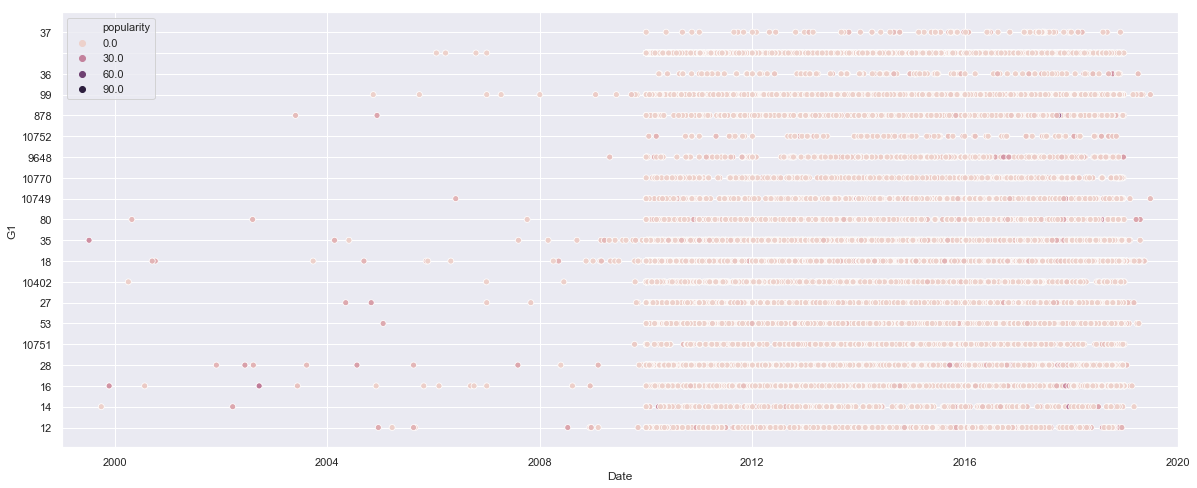

In [272]:
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(x=movies_df.Date, y=movies_df['G1'], hue = movies_df.popularity)
plt.xlim(datetime(1999, 1, 1), datetime(2020, 1, 1))

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

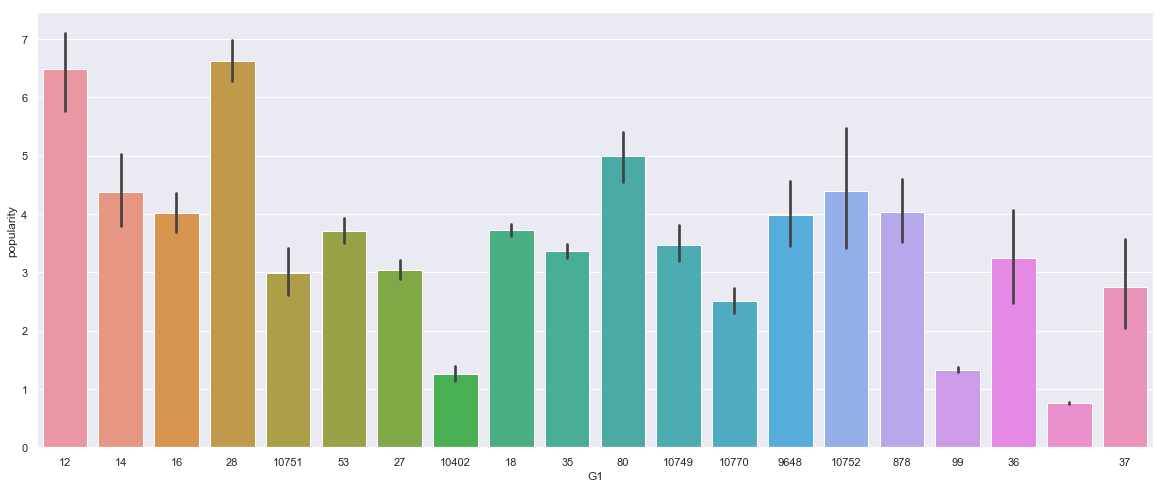

In [283]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(y = movies_df.popularity, x = movies_df.G1)
sns.set